### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks

In [202]:
def ab_hough(edges, a_min=-5, a_max=5, a_step=.05, b_min=-100, b_max=100, b_step=1):
    A = np.arange(a_min, a_max, a_step)
    B = np.arange(b_min, b_max, b_step)

    H = np.zeros((A.shape[0], B.shape[0]), dtype=int)

    for y in range(edges.shape[0]):
        for x in range(edges.shape[1]):
            if edges[y, x]:
                for a_idx, a in enumerate(A):
                    b = y - a*x
                    b_idx = np.argmin(abs(B-b))

                    H[a_idx, b_idx] += 1

    return H

def show_hough(edges, a_min=-5, a_max=5, a_step=.05, b_min=-100, b_max=100, b_step=1):
    h = ab_hough(edges, a_min=a_min, a_max=a_max, a_step=a_step, b_min=b_min, b_max=b_max, b_step=b_step)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].imshow(edges, 'gray', origin='lower')
    ax[0].set_title('edges')

    ax[1].imshow(h, 'gray', origin='lower')
    ax[1].set_title('Hough')
    ax[1].set_xlabel('b')
    ax[1].set_ylabel('a')

    A = np.arange(a_min, a_max, a_step)
    B = np.arange(b_min, b_max, b_step)

    n_xticks = 10
    xticks = list(range(0, h.shape[1], h.shape[1] // n_xticks))
    ax[1].set_xticks(xticks + [h.shape[1]])
    ax[1].set_xticklabels([f"{B[x]}" for x in xticks] + [b_max])

    n_yticks = 10
    yticks = list(range(0, h.shape[0], h.shape[0] // n_yticks))
    ax[1].set_yticks(yticks + [h.shape[0]])
    ax[1].set_yticklabels([f"{A[y]:.2f}" for y in yticks] + [a_max])

    plt.tight_layout()
    plt.show()

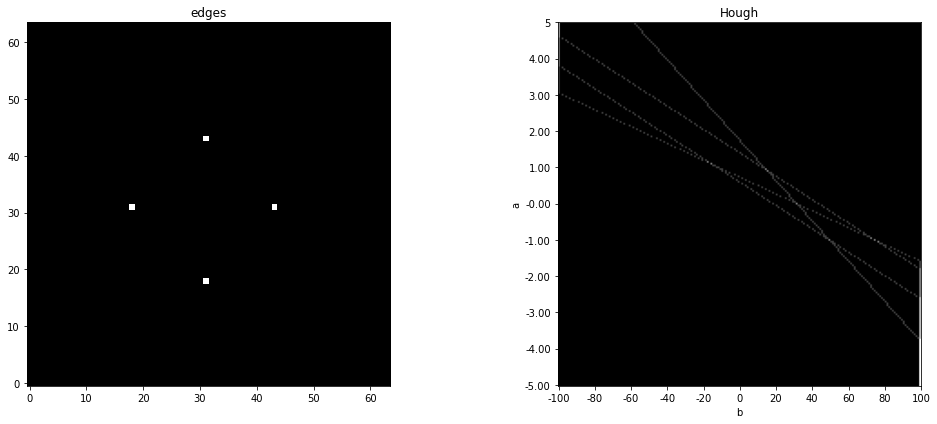

In [203]:
im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1
im[31, 18] = 1
im[31, 43] = 1
im[43, 31] = 1

show_hough(im)

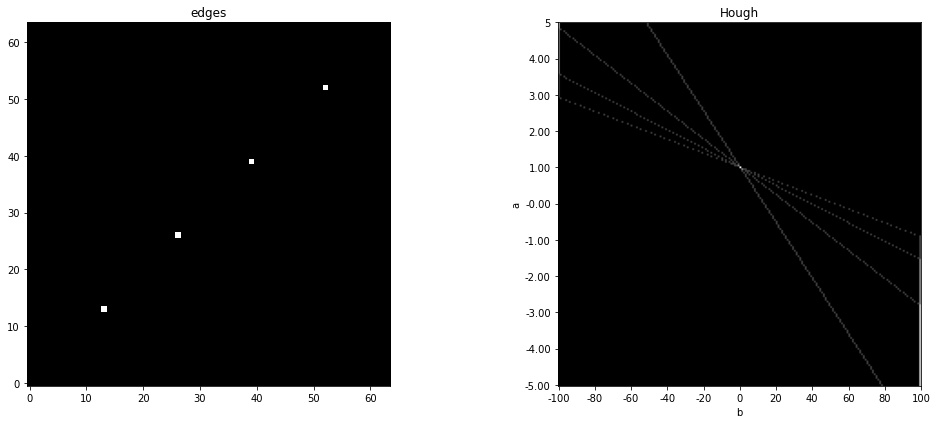

In [206]:
im = np.zeros((64,64), dtype=np.uint8)
im[13, 13] = 1
im[26, 26] = 1
im[39, 39] = 1
im[52, 52] = 1

show_hough(im)

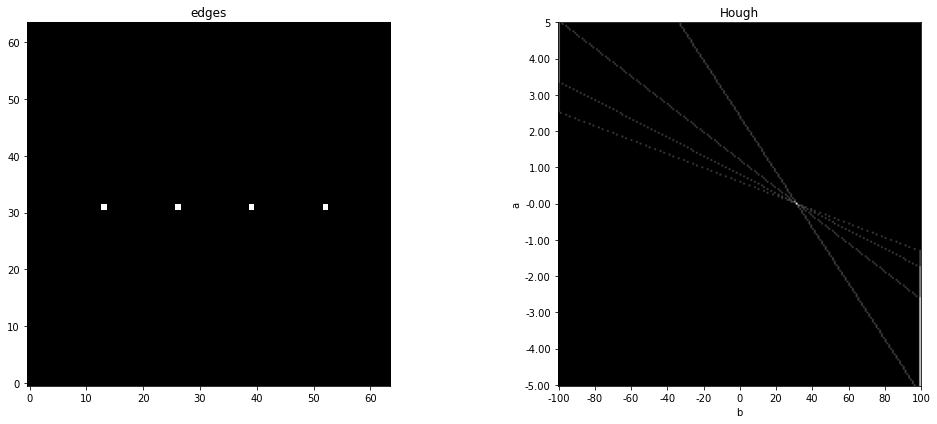

In [212]:
im = np.zeros((64,64), dtype=np.uint8)
im[31, 13] = 1
im[31, 26] = 1
im[31, 39] = 1
im[31, 52] = 1

show_hough(im)

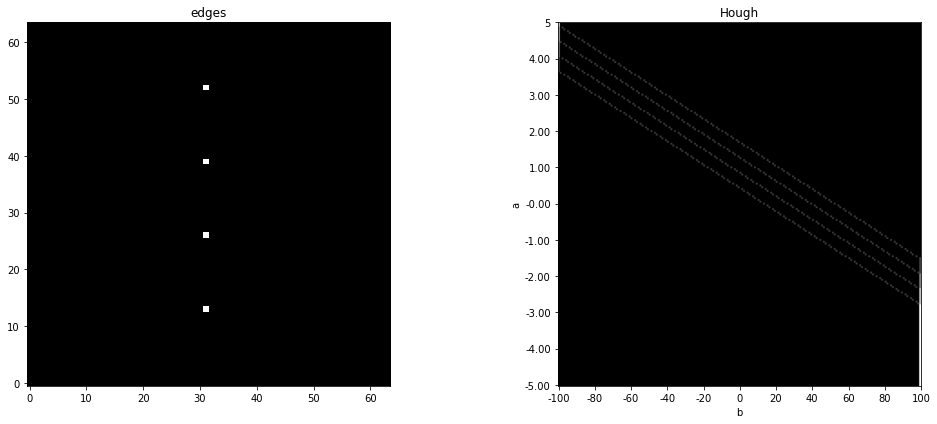

In [209]:
im = np.zeros((64,64), dtype=np.uint8)
im[13, 31] = 1
im[26, 31] = 1
im[39, 31] = 1
im[52, 31] = 1

show_hough(im)